# Supervised Learning

## Regression
- Target values are continuous values.
- Trong mô hình regression cần check __variable magnitude__ --> need to scaling features

### Linear model

**Assumption**

Nếu thoả mãn các assumption dưới đây thì coef và params của regression sẽ không bị bias và mô hình chính xác, còn vi phạm thì nên xem xét sử dụng non-linear model hoặc sử dụng transform feature engineer hoặc remove outliers:
- ___Linearity___: There is a linear relationship between predictors and target
- ___No perfect multicollinearity___: there are no perfect /high linear relationship between 2 or more of the predictors
- ___Normally distributed errors___: The residuals are random and normally distributed with a mean of 0
- ___Homoscedasticity___: at each level of the predictor variables, the variance of the error should be constant
- ___No Auto Correlation___: trong time-series model, Các biến Y ít có tương quan với nhau, kiểm định thông qua Durbin-Watson statistic

**Types of Linear models**
- Linear regression
- Ridge/Lasso regression
- Logistic regression
- Linear discriminant analysis - LDA

**Evaluate model performance**
- Kiểm tra xem có linear relationship between X and Y, X and other X
- Kiểm định auto-correlation bằng Durbin-Watson statistic
- Variance inflation factor (VIF) để check multi-collinearity
    - Các biến luôn có tương quan ít nhiều với nhau, khi hai biến có tương quan lớn với nhau sẽ làm giảm mức độ tin cậy của weight của các biến đó, tính giải thích cho biến phụ thuộc càng ít ý nghĩa. Do khi biến A thay đổi thì sẽ tác động trực tiếp đến biến B, từ đó mới tác động đến Y, chứ A ko tác động trực tiếp đến biến Y.
- Thiếu các biến quan trọng, giải thích tốt cho biến Y trong model
- Kiểm tra residuals distribution with zero-mean normal by Q-Q plot, or KS-test
- Ngoài việc xác định outliers từ sample thì detect outliers thông qua sự khác biệt giữa y_real và y_predicted theo `standardized residual` = `error` / `SE`
- Phân tích ảnh hưởng của high_leverage obs (Influential observations), hỗ trợ xác định anomaly, các pp:
    - hat-value > 2(p+1)/n
    - Cook's distance > 4/(n-p-1)

<AxesSubplot: >

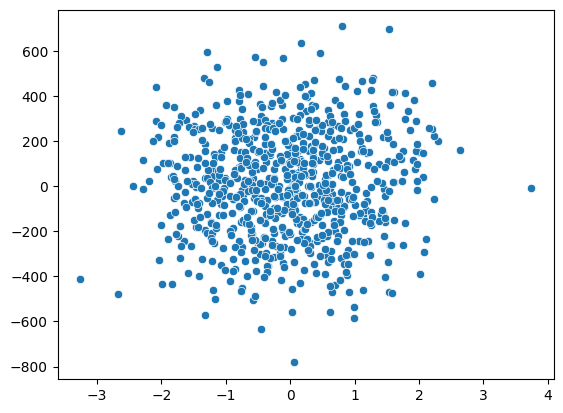

In [68]:
# make data
import numpy as np
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=1000, n_features=25, n_informative= 15, bias= 1, noise=50, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y)
sns.scatterplot(x = X_train[:,-1], y = y_train)

#### OLS
- Minimize the `RSS` (sum of square of error)

$$RSS(\beta) = \sum_{i=1}^{n}(y_i - \hat{y_i})^2$$

where $RSS(\beta)$ is the residual sum of squares, $y_i$ is the dependent variable, $\beta_0$ is the intercept, $\beta_j$ are the regression coefficients, $x_{ij}$ are the independent variables, $n$ is the number of observations, $p$ is the number of independent variables, and $\lambda$ is the penalty parameter. The penalty term $\lambda\sum_{j=1}^{p}|\beta_j|^2$ is added to the OLS regression model to prevent overfitting and to encourage sparsity in the regression coefficients.

In [55]:
from sklearn import linear_model
reg = linear_model.LinearRegression(
         positive=False  # if Target y is positive, then set True
            )
reg.fit(X_train, y_train)

# R-squared score
reg.score(X_test, y_test)

0.8257897856095553

#### Lasso Regression

Minimize `RSS_Lasso` :
$$\operatorname*{min}_{w}{\frac{1}{2n_{\mathrm{samples}}}}||X w-y||_{2}^{2}+\alpha||w||_{1} $$

where $\alpha$ is the regularization parameter

- Lasso giống OLS nhưng thêm phần `L1 Regularizations`penalty, `L1 Regularizations`penalty giúp model giảm thiểu bị over-fitting và tính phức tạp của model mạnh mẽ hơn `L2 Regularizations` penalty, Sử dụng `absolute of weights` , hay còn gọi là `L1` regularization penalty
- `alpha` càng cao thì more regularizations , tức là model càng giảm mạnh tính over-fitting
- L1 Regularizationspenalty : giảm overfit mạnh hơn L2
- Mô hình Lasso giảm sự phức tạp cho model, nên sẽ estimate ra nhiều `w(i)` = 0 hơn.
- **Lasso Phù hợp hơn khi áp dụng cho model tạo ra ít số lượng feature nhưng mỗi feature có high effect so với Ridge**

**Lasso**

In [56]:
reg = linear_model.Lasso(
    alpha=0.1,
    positive=False  # if Target y is positive, then set True
)
reg.fit(X_train, y_train)

# R-squared score
reg.score(X_test, y_test)

0.8259036390894249

**LassoCV**

In [57]:
# using LassoCV khi dữ liệu nhiều chiều high - dimensional datasets
reg = linear_model.LassoCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train, y_train)

# R-squared score
print('alpha = ', reg.alpha_)

# R-squared score
reg.score(X_test, y_test)

alpha =  1.0


0.8266707896044623

**LassoLarsCV**

In [58]:
# using LassoLarsCV khi dữ liệu nhiều chiều high n_features và ít quan sát low n_samples (nhỏ hơn số n_features)
# LassoLarsCV is based on the Least Angle Regression algorithm.
reg = linear_model.LassoLarsCV()
reg.fit(X_train[:30], y_train[:30])

# R-squared score
print('alpha = ', reg.alpha_)

# R-squared score
reg.score(X_test, y_test)

alpha =  4.327832825318372


0.5948759288127505

__Model Selection__


1. For a linear Gaussian model, the maximum log-likelihood is defined as:
$$\log(\hat{L})=-\frac{n}2\mathrm{log}(2\pi)-\frac{n}2\mathrm{ln}(\sigma^{2})-\frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^{2}}{2\sigma^{2}}$$
where $\sigma^{2}$ is an estimate of the `noise variance` and $n$ is the number of samples.

`noise variance` = $\sigma^{2}={\frac{\sum_{i=1}^{n}(y_{i}-{\hat{y}}_{i})^{2}}{n-p}}$

2. AIC and BIC
$$AIC=-2\log(\hat{L})+2d$$

$$BIC=-2\log(\hat{L})+\log(N)d$$

where $d$ is the number of parameters (degree of freedom).

**LassoLarsIC**

In [59]:
# LassoLarsIC ước lượng minimize AIC và BIC để làm phương pháp model selection
# BIC phạt nặng hơn sơ với AIC
# LassoLarsIC tính toán nhẹ hơn so với LassoCV do chỉ tính toán 1 lần thay vì k+1 lần cho k-fold CV
reg = linear_model.LassoLarsIC()
reg.fit(X_train, y_train)

# R-squared score
print('alpha = ', reg.alpha_)

# R-squared score
reg.score(X_test, y_test)

alpha =  2.4756569894173026


0.8264705204381142

#### Ridge Regression

Minimize `RSS_Ridge` :
$$ \operatorname*{min}_{w}||X w-y||_{2}^{2}+\alpha||w||_{2}^{2} $$
where $\alpha$ is the regularization parameter

- Ridge giống OLS nhưng thêm phần `L2 Regularizations`, `L2 Regularizations` giúp model giảm thiểu bị over-fitting và tính phức tạp của model, Sử dụng `square of weights` , hay còn gọi là `L2` regularization
- `alpha` càng cao thì more regularizations , tức là model càng giảm mạnh tính over-fitting
- So sánh với L1 thì L2 tìm được nhiều điểm tối ưu hơn khi làm `loss` tiến về 0

<img src="_images/01_sl_reg_cmpare_l1_l2.png">

- **Ridge Phù hợp hơn khi áp dụng cho dataset nhiều số lượng feature và mỗi feature có low effect tới target Y**

In [60]:
reg = linear_model.Ridge(alpha=1)
reg.fit(X_train, y_train)

# R-squared score
reg.score(X_test, y_test)

0.8256781508633866

In [61]:
# Ridge with cross validation
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train, y_train)

# alpha
print('alpha = ', reg.alpha_)

# R-squared score
reg.score(X_test, y_test)

alpha =  10.0


0.8245713267410536

#### Elastic-Net
Linear regression model trained with both L1 and L2 -norm regularization of the coef, học những features quan trọng (non-zero) như lasso và giữ được tính regularization của Ridge
- Elastic-net is useful cho dữ liệu có nhiều features tương quan với nhau
- Hai tham số cần tunning là `alpha` $\alpha$ và `l1_ratio` $p$, thuật toán minimize function:
$$\operatorname*{min}_{w}\frac{1}{2n_{\mathrm{samples}}}||X w-y||_{2}^{2}+\alpha\rho||w||_{1}+\frac{\alpha(1-\rho)}{2}||w||_{2}$$

- $p$ càng gần 1 thì càng ưu tiên tỷ trọng L1, gần 0 thì càng ưu tiên tỷ trọng L2

In [62]:
reg = linear_model.ElasticNetCV(
    alphas=np.logspace(-6, 6, 13),
    l1_ratio = [.1, .5, .7, .9, .95, .99, 1])
reg.fit(X_train, y_train)

# alpha, l1_ratio
print('alpha = ', reg.alpha_)
print('l1_ratio = ', reg.l1_ratio_)

# R-squared score
reg.score(X_test, y_test)

alpha =  1.0
l1_ratio =  1.0


0.8266707896044623

#### Bayesian Regression
Ước lượng mô hình được tunning qua data, thu được kết quả là xác suất của Y với giả sử Y tuân theo Normal distribution với mean là ước lượng của y (Xw)
$$p(y|X,w,\alpha)=\mathcal{N}(y|X w,\alpha)$$
trong đó $\alpha$ là biến ngẫu nhiên

1. Pros
- Uớc lượng thích nghi, có thể tunning liên tục
- Sử dụng cả regularization trong quá trình ước lượng, tránh overfitting

2. Cons
- Tốn thời gian tính toán

__Bayesian Ridge Regression__

`BayesianRidge` ước lượng các hệ số mô hình xác suất, trong đó các coef $w$ được ước lượng thông qua $w$ ước lượng trước đó theo xác suất normal $p(w|\lambda)={\mathcal{N}}(w|0,\lambda^{-1}\mathbf{L}_{p})$

Các params cần tuning là $\alpha_1$, $\alpha_2$, $\lambda_1$, $\lambda_2$ lần lượng là tham số của gamma distribution ước lượng $\alpha$ và $\lambda$

- Ước lượng của `BayesianRidge` sẽ khác OLS do có quá trình cập nhật liên tục

In [63]:
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)


# R-squared score
reg.score(X_test, y_test)

0.8250422695154389

#### Logistic regression
- Mô hình ước lượng các xác suất cho 1 outcome cụ thể trong list các outcomes theo single trial theo hàm logistic, sử dụng Maximum likelihood estimation (MLE) để model ước lượng xác suất cho label.
- Mô hình được sử dụng cho việc phân loại, áp dụng cho `Binary`, `One-vs-Rest`, hoặc `multinomial logistic regression` with optional L1, L2 or Elastic-Net regularization.
- Categorical variable phải được encode sang numeric


**Logistic Function**
1. Logistic response function: transform function từ linear model sang xác suất p giúp đảm bảo p trong khoảng [0,1]
$$P(Y=1) ={\frac{1}{1+e^{-\left[\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+\cdots+\beta_{q}x_{q}\right]}}} = {\frac{1}{1+\frac{1}{Odds(Y=1)}}}$$

<img src="_images/01_sl_reg_logistic_f.png">

2. Log odds - logit function: Map xác suất p từ [0,1] sang bất kỳ value nào sau khi transform, sử dụng linear model để dự đáon và invert logit function để lấy xác suất, kết hợp với cut-off rule để xác định nhãn cho Y
$$\log\,{\mathrm{(Odds}}(Y=1))=\beta_{0}+\beta_{1}x_{1}+\beta_{2}x_{2}+\cdots+\beta_{q}x_{q}$$

3. Minimize the Cost Function
$$\operatorname*{min}_{w} C \sum_{i=1}^{n}(-y_{i}\log({\hat{p}}(X_{i}))-(1-y_{i})\log(1-{\hat{p}}(X_{i})))+r(w)$$

- `C`: `C` càng cao, model càng phức tạp, tính Regularization càng nhỏ
- $r(w)$: phạt bổ sung theo L1, L2 or Elastic-Net, mặc định $\alpha$ = 1, cần tunning `l1_ratio` $\rho$ nếu dùng `ElasticNet`
    - `None`: 0
    - `L1`: $||w||_{1}$
    - `L2`: $\frac{1}{2}||w||_{2}^{2}$
    - `ElasticNet`: $\textstyle{\frac{1-\rho}{2}}||w||_{2}^{2}+\rho|\vert w\vert|_{1}$

**Solvers** 

([Chi tiết tại 1.1.11.3. Solvers](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression))
|                     | ‘lbfgs’ | ‘liblinear’ | ‘newton-cg’ | ‘newton-cholesky’ | ‘sag’ | ‘saga’ |
| ---------------------------- | ------- | ------- | ------- | ------- | ------- | ------- |
| __Penalties__                    |  |  |  |  | |  |
| Multinomial + L2 penalty     | yes     | no | yes | no | yes | yes |
| OVR + L2 penalty             | yes     | yes | yes | yes | yes | yes |
| Multinomial + L1 penalty     | no      | no | no | no | no | yes |
| OVR + L1 penalty             | no      | yes | no | no | no | yes |
| Elastic-Net                  | no      | no | no | no | no | yes |
| No penalty (‘none’)          | yes     | no | yes | yes | yes | yes |
| __Behaviors__                    |         |  |  |  |  |  |
| Penalize the intercept (bad) | no      | yes | no | no | no | no |
| Faster for large datasets    | no      | no | no | no | yes | yes |
| Robust to unscaled datasets  | yes     | yes | yes | yes | no | no |

- The “lbfgs” solver hiệu quả trong đa số TH. 
- “saga” solver chạy nhanh hơn cho dữ liệu lớn, hoặc có thể cân nhắc sử dụng `SGDClassifier` with `loss`="log_loss" để nhanh hơn nhưng yêu cầu tunning nhiều hơn để đạt hiệu quả.

**Dữ liệu imbalance**
- Phân loại sai từ 1 thành 0 sẽ tốn kém hơn phân loại sai từ 0 thành 1, ngưỡng cutoff cho class 1 (hiếm hơn 0) thường dưới 50% để đảm bảo khả năng predict 1 dễ bắt hơn.

**Logistic probability result**
- In practice, a upper cut-off probability (Y=1) often appropriate for the rare class.
- coeff 𝛽 in logistic is the log of odds ratio for X, so use the log scale to get the change for a unit change in X. Ví dụ, Hệ số biến X là -4.6 thể hiện khi biến X tăng lên 1 unit thì biến Y tăng exp(-4.6) = 0.01 lần, tức là giảm 100 lần.
- `Odds Ratio`: Thể hiện mối liên hệ giữa biến Y và X trong phân tích logistic regression, thể hiện Y=1 khi X=1 cao gấp OR lần Y=1 khi X=0, nếu OR =1 tức không có mỗi liên hệ nào giữa X và Y. Tuy nhiên, việc xác định khoảng tin cậy của OR sẽ ở range lớn, việc ta cần làm chỉ là cần biết khoảng tin cậy OR >1 tức thể hiện rằng biến Y và X có mỗi tương quan với nhau.
$${\mathrm{odds~ratio}}={\frac{\mathrm{Odds}(Y=1|X=1)}{\mathrm{Odds}(Y=1|X=0)}}$$
- `P-value`, giống như linear regression thì p-value mức độ quan trọng của biến hơn thay vì mức độ ý nghĩa của biến trong mô hình
- Sử dụng logistic L1-base như một phương pháp trong feature selection [1.13.4.1. L1-based feature selection](https://scikit-learn.org/stable/modules/feature_selection.html#l1-feature-selection)


In [64]:
# make logistic with cross-validation in BINARY
from sklearn.datasets import make_classification

X_cl, y_cl = make_classification(n_samples=200, n_features=20, n_informative=10, n_redundant=5, n_classes=2,)

logis = linear_model.LogisticRegressionCV(Cs = 20, penalty = 'l2', )
logis.fit(X_cl, y_cl)

print(logis.C_)

logis.score(X_cl, y_cl)

[0.23357215]


0.885

#### Generalized Linear Models
GLM là một dạng mở rộng của linear regression thông qua:
1. Sử dụng hàm inverse link `h`: 
$$\hat{y}(w,X)\,=\,h(X w)$$
2. Sử dụng hàm unit deviation d, kết hợp với L2-regularization như một hàm Cost, cần minimize: 
$$\operatorname*{min}_{w}\frac{1}{2n_{\mathrm{samples}}}\sum_{i}d(y_{i},\hat{y}_{i})+\frac{\alpha}{2}\vert\vert w\vert\vert_{2}^{2}$$

Bảng các hàm unit deviation d cho từng dạng phân phối của Y

<img src="_images/01_sl_reg_unit_d.png">

__Note__: Logistic regression là TH đặc biệt của Generalized Linear Models với a Binomial / Bernoulli conditional distribution Y and transform từ model prediction sang Y distribution bởi Logit link.


**Lựa chọn Y distribution**
- Nếu Y là count-value (nguyên không âm) hoặc relative frequencies (không âm) thì có thể lựa chọn `d` theo `Poisson` và `h` là `log-link`
- Nếu Y là số dương có skewed distribution thì thì có thể lựa chọn `Gamma` + `log-link`, nếu skewed nặng hơn so với `gamma` thì thì có thể lựa chọn  `Inverse Gaussian` + `log-link` 
- Nếu Y là xác suất thì chọn `Bernoulli` + `log-link` cho __Binary__ và `Categorical Dis` + `softmax-link` cho __multiclass classification__

Ví dụ:
- __Thời tiết__: Số lượng đợt mưa trong năm (Poission), tổng lượng mưa (Gamma/Tweedie/ Poisson + Gamma)
- __Risk modeling/định giá bảo hiểm__: Số lượng người/Số lần claim bảo hiểm mỗi năm (Poisson), Chi phí mỗi lần claim (Gamma), Tổng chi phí claim mỗi năm (Tweedie / Compound Poisson Gamma).
- __Vỡ nợ__: Xác suất khoản vay không trả được nợ (Bernouli).
- __Gian lận__: Xác suất giao dịch là rửa tiền (Bernoulli).
- __Sản suất__: Số lần bị gián đoạn trong sản xuất trong năm (Poisson), Quãng thời gian gián đoạn sản xuất (Gamma), Tổng thời gian gián đoạn sản xuất trong năm (Tweedie / Compound Poisson Gamma).
- __Y tế__: Xác suất chữa khỏi/gặp tác dụng phụ của bệnh nhân (Bernoulli).
- __Phân loại báo chí__: Phân loại các tờ báo vào 3 loại A, B, C (Categorical). 

**In sklearn**

`TweedieRegressor` thực hiện GLM cho phân phối Tweedie thông qua `power` parameter:

- `power` = 0: `Normal` distribution. Specific estimators such as `Ridge`, `ElasticNet` are generally more appropriate in this case.
- `power` = 1: `Poisson` distribution. Có thể sử dụng  `PoissonRegressor` hoặc `TweedieRegressor`(power=1, link='log').
- `power` = 2: `Gamma` distribution. Có thể sử dụng `GammaRegressor` hoặc `TweedieRegressor(power=2, link='log')`.
- `power` = 3: `Inverse Gaussian` distribution.
The link function is determined by the `link` parameter.

In [ ]:
from sklearn.linear_model import TweedieRegressor
reg = TweedieRegressor(power=3, alpha=0.5, link='log')
reg.fit(X_train, y_train)

### Non-linear transform model

#### Polynomial features
Tạo ra các biến phái sinh theo degree bởi các biến có sẵn, ví dụ với degree = 2 from [x1, x2] to [1, x1, x2, x1^2, x1x2, x2^2]

Do Poly thường làm model thêm complex tức sẽ gây ra overfitting nên ta thường kết hợp với Regularization để giảm overfitting, like Ridge or Lasso

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])

In [ ]:
# sử dụng only interaction features, ko cần xử dụng higher powers of any single feature
PolynomialFeatures(interaction_only=True)

#### Splines regression
Fit đường smooth curve thông qua các điểm knots trên polynomial features
- knots: các điểm phân tách spline thành các phần polynomial
- Basis splines: là đường splines có các điểm knots tại các vị trí 25%, 50%, 75% quartile
- GAM - generalized additive models: Mô hình splines auto select các điểm knots, pyGAM package in python

#### Isotonic regression

## Naive Bayes
[Chi tiết](https://machinelearningcoban.com/2017/08/08/nbc/)

Sử dụng lý thuyết bayes, đánh giá xác xuất có điều kiện `P(Y=n | X = xi)` thể hiện xác suất rơi vào từng class của `xi` với `xi` là 1 quan sát, `n` là 1 trong các class của Y. 
$$P(Y=i|X_{1},X_{2},\ldots,X_{p}) =\frac{P(Y=i)P(X_{1}|Y=i)...P(X_{p}|Y=i)}{P(Y=0)P(X_{1}|Y=0)...P(X_{p}|Y=0) + P(Y=1)P(X_{1}|Y=1)...P(X_{p}|Y=1)}$$
Trong đó:
- X được giả sử là independence
- Posterior probability: Xác suất Y=i given predictor infomation
- Prior probability: Xác suất Y=i not talking about predictor infomation

NB Chỉ phù hợp với dữ liệu categorical features and output, nếu muốn áp dụng cho dữ liệu numeric thì cần thực hiện 1 trong 2 cách:
- Bin và convert numerical features to category
- Use a probability model to estimate the conditional probability. Ví dụ, giả định theo phân phối normal thì sẽ tính được P(Xj | Y=i )

**Tóm tắt**
- Naive Bayes Classifiers (NBC) thường được sử dụng trong các bài toán __Text Classification__.
- NBC có thời gian training và test rất nhanh. Điều này có được là do giả sử về tính độc lập giữa các thành phần, nếu biết class.
- Nếu giả sử về tính độc lập được thoả mãn (dựa vào bản chất của dữ liệu), NBC được cho là cho kết quả tốt hơn so với SVM và logistic regression khi có ít dữ liệu training.
- NBC có thể hoạt động với các feature vector mà một phần là liên tục (sử dụng Gaussian Naive Bayes), phần còn lại ở dạng rời rạc (sử dụng Multinomial hoặc Bernoulli).
- Khi sử dụng Multinomial Naive Bayes, Laplace smoothing thường được sử dụng để tránh trường hợp 1 thành phần trong test data chưa xuất hiện ở training data.

**Phân loại các phân phối Naive Bayes**

### Gaussian Naive Bayes
- Mô hình này được sử dụng chủ yếu trong loại dữ liệu mà các feature là các biến liên tục, Giả sử với mỗi chiều dữ liệu dữ liệu `i` và 1 class `c`, $x_i$ tuân theo phân phối Normal:
$$p(x_{i}|c)=p(x_{i}|\mu_{c i},\sigma_{c i}^{2})=\frac{1}{\sqrt{2\pi\sigma_{c i}^{2}}}\mathrm{exp}\left(-\frac{(x_{i}-\mu_{c i})^{2}}{2\sigma_{c i}^{2}}\right)$$
Trong đó các tham số $\mu_{c i}$, $\sigma_{c i}^{2}$ được ước lượng theo MLE

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.88      1.00      0.94        30
           2       1.00      0.83      0.91        24

    accuracy                           0.95        75
   macro avg       0.96      0.94      0.95        75
weighted avg       0.95      0.95      0.95        75



### Multinomial Naive Bayes
Mô hình này chủ yếu được sử dụng trong phân loại văn bản mà feature vectors được tính bằng __Bags of Words__. Lúc này, mỗi văn bản được biểu diễn bởi một vector có độ dài `d` chính là số từ trong từ điển. Giá trị của thành phần thứ `i` trong mỗi vector chính là số lần từ thứ `i` xuất hiện trong văn bản đó. Ta tính xác suất $p(x_i|c)$:
$$\lambda_{c_i}=p(x_{i}|c)=\frac{N_{c_i} + \alpha }{N_{c} + d\alpha}$$
Trong đó:
- $N_{c_i}$ là tổng số lần từ thứ `i` xuất hiện trong văn bản được phân loại là class `c`, hay nói cách khác là tổng số lần xuất hiện của từ `i` trong class c
- $N_{c}$ là tổng số từ (tính cả lặp) xuất hiện trong class c
- $\alpha$ thường = 1, là laplace smoothing để khắc phục TH class c mới trong lúc test, nhưng ko có trong train

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib. pyplot as plt
def plot_cm(y_test, y_test_pred, labels = None):
    cm = confusion_matrix(y_test, y_test_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels).plot()
    plt.grid(False)

In [74]:
# **Bài toán phân loại email spam**
# Mỗi quan sát là thể hiện số lượng từ thứ i trong email đó, và is_spam là label có phải là spam hay không ?

data = pd.read_csv(r'Datasets/email_spam_classification/email.csv', index_col=[0])

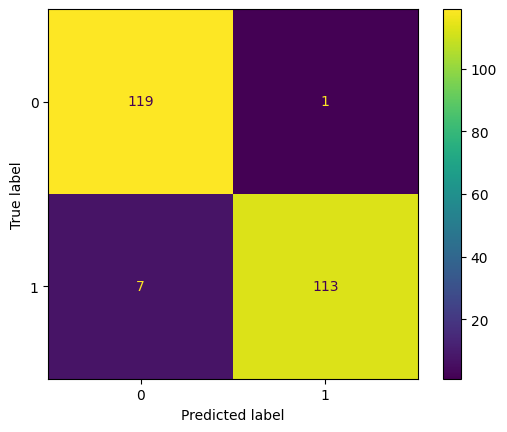

In [75]:
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(data.drop('is_spam', axis =1 ), 
                                                    data['is_spam'], 
                                                    stratify=data['is_spam'], 
                                                    shuffle=True)
clf = MultinomialNB().fit(X_train, y_train)
plot_cm(y_test, clf.predict(X_test))

### Bernoulli Naive Bayes
Mô hình này được áp dụng cho các loại dữ liệu mà mỗi thành phần là một giá trị binary - bẳng 0 hoặc 1. Ví dụ: cũng với loại văn bản nhưng thay vì đếm tổng số lần xuất hiện của 1 từ trong văn bản, ta chỉ cần quan tâm từ đó có xuất hiện hay không.
Ta tính:
$$p(x_{i}|c)=p(i|c)^{x_{i}}(1-p(i|c)^{1-x_{i}}$$
Trong đó $p(i|c)$ có thể được hiểu là xác suất từ thứ `i` xuất hiện trong các văn bản của class `c`.

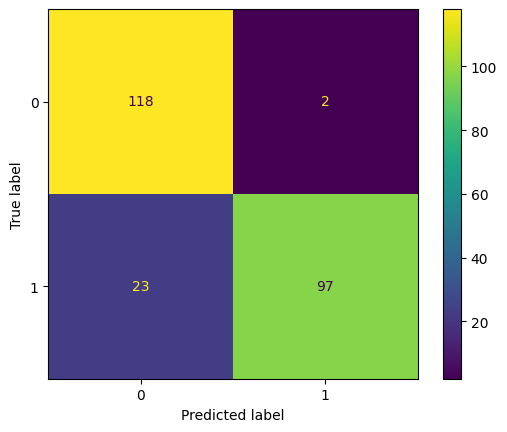

In [49]:
from sklearn.naive_bayes import BernoulliNB
X_train, X_test, y_train, y_test = train_test_split((data.drop('is_spam', axis =1 )>0).astype(int), 
                                                    (data['is_spam']>0).astype(int), 
                                                    stratify=data['is_spam'], 
                                                    shuffle=True)
clf = BernoulliNB().fit(X_train, y_train)
plot_cm(y_test, clf.predict(X_test))

### Categorical Naive Bayes
Phù hợp với bài toán classification cho data category features

In [ ]:
from sklearn.naive_bayes import CategoricalNB
X_train, X_test, y_train, y_test = train_test_split(data.drop('is_spam', axis =1 ), 
                                                    data['is_spam'], 
                                                    stratify=data['is_spam'], 
                                                    shuffle=True)
clf = CategoricalNB().fit(X_train, y_train)
plot_cm(y_test, clf.predict(X_test))

## Discriminant Analysis

### Linear Discriminant Analysis (LDA)
- LDA là thuật toán đi tìm một phép chiếu sao cho tỉ lệ giữa `between-class variance` và `within-class variance` lớn nhất có thể:
    - __Within-class variances (SSwithin)__: Phương sai s2 của từng class khi chiếu lên 1 chiều nhất định, thể hiện mức độ phân tán dữ liệu của class khi chiếu lên chiều đó. Kỳ vọng càng thấp càng tốt.
    - __Between-class variance (SSbetween)__: Khoảng cách giữa 2 kỳ vọng của 2 class, thể hiện mức độ cách xa nhau của 2 class: (mean_class1 - mean_class2)^2
- Hai classes được gọi là discriminative nếu hai class đó cách xa nhau (`between-class variance` lớn) và dữ liệu trong mỗi class có xu hướng giống nhau (`within-class variance` nhỏ). 
    - Số chiều không gian mới sau khi giảm chiều bằng LDA thì ko  vượt quá C-1, với C là số lượng class của label
    - LDA có giả sử ngầm rằng dữ liệu của các classes đều tuân theo phân phối chuẩn và các ma trận hiệp phương sai của các classes là gần nhau
    - LDA hoạt động rất tốt nếu các classes là linearly separable, tuy nhiên, chất lượng mô hình giảm đi rõ rệt nếu các classes là không linearly separable. Điều này dễ hiểu vì khi đó, chiếu dữ liệu lên phương nào thì cũng bị chồng lần, và việc tách biệt không thể thực hiện được như ở không gian ban đầu.
- LDA Là phương pháp phân loại/hoặc giảm chiều dữ liệu cho bài toán classification, hoặc __bổ sung thông tin__ về label dữ liệu, áp dụng cho cả việc giảm chiều cũng như bài toán phân loại. 
- Khác với PCA là giảm chiều nhưng giữ lại mức độ variance của dữ liệu lớn nhất và ko cần thông tin về label của class (không phải việc giữ lại thông tin nhiều nhất sẽ luôn mang lại kết quả tốt nhất khi phân loại)

In [78]:
X_train.shape

(375, 20)

In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

X_cl, y_cl = make_classification(n_samples=500, n_features=20, n_informative=10, n_redundant=5, n_classes=2,)

X_train, X_test, y_train, y_test = train_test_split(X_cl, y_cl)

clf_lda = LinearDiscriminantAnalysis(n_components=1, solver='svd').fit(X_train, y_train)

# score
print(accuracy_score(y_test, clf_lda.predict(X_test)))

# reduce the dimensionality
X_lda = clf_lda.transform(X_test)
print(X_lda.shape)

0.864
(125, 1)


In [82]:
X_lda[:3]

array([[-0.69525204],
       [-0.22320779],
       [-0.30563419]])

### Quadratic Discriminant Analysis.
- Tương tự LDA nhưng thay vì linear thì là bậc 2 (quadratic), fitting class bằng quy tắc Bayes. Mỗi class được fit theo phân phối chuẩn Normal. 

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysi

## Stochastic Gradient Descent
[Chi tiết](https://scikit-learn.org/stable/modules/sgd.html#sgd)

Linear fitting model (SVM, logistic regression, linear regression, etc.) (config by `loss` parameter) with SGD training: tối thiểu gradient (độ dốc) hàm loss liên tục qua mỗi batch liên tục (mặc định SGD __batchsize__ = Online SGD batchsize = 1, Mini-batch SGD batchsize > 1 but < n_samples)

- Sử dụng hàm loss và fit lần lượt dữ liệu để tối thiểu hoá hàm convex loss thông qua gradient descent (đạo hàm)
- SGD fit minibatch với method `partial_fit` (chỉ có ở 1 số algorithms) cho phép học online hoặc out-of-core learning (học tăng cường/cải thiện hơn so với model trước đó)
- Nên sử dụng `StandardScaler` engineering trước khi fit
- Phù hợp với dữ xliệu lớn > 10000 obs

**Stopping criterion**
- With `early_stopping`=`True`: input data được chia thành train + validation. Model  sẽ fit train set và tiêu chí dừng lại dựa vào prediction score của validation set. size của validation set theo param `validation_fraction`
- With `early_stopping`=`False`: model sẽ fit toàn bộ input data và điều kiện dừng phụ thuộc vào objective funciton được tính toán trên tập train

Trong cả hai TH của `early_stopping`, hàm loss đều được tính toán lại sau mỗi 1 epoch, điều kiện dừng là khi 1 trong 2 TH:
- hàm loss mới có xu hướng tăng lên so với best loss (the min loss) 1 giá trị lớn hơn `tol` trong vòng `n_iter_no_change` epoch liên tiếp (tức là loss > best_loss + `tol`)
- số epoch chạm ngưỡng `max_iter`

**Pros:**
- Hiệu quả nếu tunning chính xác và tỉ mẩn
- Dễ dể thực hiện và áp dụng thực tế do có cơ chế `partial_fit`

**Cons:**
- SGD yêu cầu tunning nhiều parameters.
- SGD nhạy cảm với feature scale (need to `StandardScaler`).
- Do việc học từng phần có thêm phần chi phí lưu trữ nên chỉ sử dụng khi dữ liệu thực sự lớn và chia theo chunks

### SGD Regression

**`loss` parameter**
- loss="`squared_error`": Ordinary least squares,
- loss="`huber`": Huber loss for robust regression,
- loss="`epsilon_insensitive`": linear Support Vector Regression. (linearSVM)

In [72]:
from sklearn.linear_model import SGDRegressor

reg = SGDRegressor(loss="squared_error")
reg.fit(X_train, y_train)


# R-squared score
reg.score(X_test, y_test)

0.9494588558075366

In [73]:
# partial_fit
reg.partial_fit(X_test, y_test)

# R-squared score
reg.score(X_test, y_test)

0.950614663855244

### SGD Classification

**`loss` parameter**
- ‘`hinge`’ gives a linear SVM.
- ‘`log_loss`’ gives logistic regression, a probabilistic classifier.
- ‘`modified_huber`’ is another smooth loss that brings tolerance to outliers as well as probability estimates.
- ‘`squared_hinge`’ is like hinge but is quadratically penalized.
- ‘`perceptron`’ is the linear loss used by the perceptron algorithm.
- The other losses, ‘`squared_error`’, ‘`huber`’, ‘`epsilon_insensitive`’ and ‘`squared_epsilon_insensitive`’ are designed for regression but can be useful in classification as well; see `SGDRegressor` for a description.

**`learning_rate`**
- ‘constant’: eta = eta0
- ‘optimal’: eta = 1.0 / (alpha * (t + t0)) where t0 is chosen by a heuristic proposed by Leon Bottou.
- ‘invscaling’: eta = eta0 / pow(t, power_t)
- ‘adaptive’: eta = eta0, miễn là loss tiếp tục theo chiều hướng giảm. Nếu trong vòng `n_iter_no_change` epoch mà loss tăng vượt quá `tol` hoặc validation score bị giảm quá `tol`( trong TH set `early_stopping`=`True`) thì eta = eta/5

In [99]:
X_cl, y_cl = make_classification(n_samples=2000, n_features=20, n_informative=10, n_redundant=5, n_classes=2,flip_y = 0.1)

X_train, X_test, y_train, y_test = train_test_split(X_cl, y_cl)

In [112]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline

sgd = SGDClassifier(loss='hinge', # type of loss function
                    penalty='l2', # type of penalty to coef, L1 dẫn tới phần lớn các coef = 0, elasticnet cân bằng l1 + l2
                    alpha=0.0001, # hệ số nhân với penalty, càng cao thì regularization càng lớn
                    l1_ratio=0.15, # hệ số cân bằng l1 với l2 khi sử dụng elasticnet regularization
                    fit_intercept=True, # có estimate intercept hay không ?
                    max_iter=1000, # số each tối đa cho fitting (chỉ áp dụng cho fit, ko áp dụng cho partial_fit)
                    tol=0.001, # chêch lệch tối đa cho phép giữa loss hiện tại và best_loss (the min loss), nếu vượt thì sẽ dừng lại fitting
                    shuffle=True, # data có được shuffle sau mỗi 1 each được train
                    verbose=0, 
                    epsilon=0.1, # chỉ ảnh hưởng tới hàm loss của ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’.
                                    # đối với 'huber' là ngưỡng mà tại đó những dự đoán chính xác trở nên ít quan tâm, chỉ care những dụ đoán sai gây ra nhiều loss
                                    # đối với ‘epsilon_insensitive’ là ngưỡng mà khi sự khác biệt giũa prediction và real mà nhỏ hơn ngưỡng này thì bỏ qua
                    n_jobs=None, 
                    random_state=None, # nếu không cố định, SGD performance bị ảnh hưởng rất nhiều bởi điểm khởi đầu
                    learning_rate='optimal', # xem tại note learning_rate
                    eta0=0.0, # learning_rate ban đầu
                    power_t=0.5, # hệ số chỉnh khi set learning_rate = 'invscaling'
                    early_stopping=False,  # có split ra validation set và xét early stopping trên đó hay không ?(stop khi validation score is not improved)
                    validation_fraction=0.1, # tỷ lệ phân chia cho validation set
                    n_iter_no_change=5, # số lượng epoch cho phép loss/validation score không được cải thiện
                    class_weight=None, # đánh trọng số cho tường class, dùng trong TH imbalance data
                    warm_start=False, # nếu True, sử dụng các tham số đã có của lần call fit trước đó làm các giá trị ban đầu, nếu ko thì xét lại từ đầu
                    average=False # coef được tính average weight cho các lần cập nhật hay ko, nếu True là all, nếu = 10 thì lấy average coef_ của 10 lần update gần nhất
                   )

clf = make_pipeline(StandardScaler(),sgd)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.684

## Support Vector Machines (SVM)
SVM used for __classification__, __regression__ and __outliers detection__.

__Pros:__
- Hiệu quả với dữ liệu nhiều chiều
- Hiệu quả với dữ liệu có n_features > n_sample
- Chỉ cần 1 subset để training--> hiệu quả về mặt lưu trữ ram
- Sử dụng kết hợp với __Kernel__ function để tuỳ chỉnh cách fitting

__Cons:__
- Nếu n_feature >> n_sample, cần phải tunning thật kỹ kernel và regularization term để tránh overfitting
- SVMs không cung cấp trực tiếp probability estimates prediction, mà cần tính toán qua 5-fold CV.

### SVM Classification (SVC)
Sử dụng cho binary hoặc multi-class classification, tìm 1 hyper-plane  hoặc 1 set hyper-planes trong không gian đa chiều, mà tại đó khoảng cách từ hyper-plane tới điểm gần nhất của mỗi class là lớn nhất
- `SVC` và `NuSVC` khá giống nhau, chỉ khác ở bộ tham số và hàm tính toán
- `LinearSVC` chạy nhanh do thực hiện linear kernel, do đó không thể chỉnh `kernel` parameter trong `LinearSVC`

**Multi-class classification**
- `SVC` và `NuSVC` thực hiện “one-versus-one” approach cho multi-class classification, có tổng cộng là `n_classes` * (`n_classes` - 1) / 2 sub-model
- `LinearSVC` thực hiện "one-vs-the-rest", cho nên training chỉ có `n_classes` sub-model (preferer to use)

**Unbalanced problems**
- Sử dụng `class_weight` (chỉ có trong SVC, not NuSVC) hoặc `sample_weight` parameters để thay đổi weight cho các minority class 

#### SVC
- Thực hiện dựa trên pphương pháp 'libsvm'
- Phù hợp với dữ liệu vừa và nhỏ (For large datasets consider using LinearSVC or SGDClassifier instead)
- Hỗ trợ sử dụng kernel function, tunning qua tham số:
    - gamma
    - coef0
    - degree
- Với multi-class, sử dụng pp tiếp cận one-vs-one

In [114]:
from sklearn.svm import SVC

svc = SVC(
    C=1.0, # mức độ penalty, C càng lớn thì phạt càng ít (ngược với alpha của L2, L1)
    kernel='rbf', # hàm kernel được sử dụng để transform data {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
    degree=3, # bậc của 'poly' kernel
    gamma='scale', # hệ số của hàm kernel ‘rbf’, ‘poly’ and ‘sigmoid’.
    coef0=0.0, # hệ số independent term của hàm kernel ‘poly’ and ‘sigmoid’.
    shrinking=True, 
    probability=False, # có ước lượng xác suất của prediction hay ko ?
    tol=0.001, # ngưỡng của điều kiện dừng
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)

svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.898

#### LinearSVC
- Thực hiện tương tự như SVC kernel = 'linear' và dựa trên phương pháp 'liblinear'
- Phù hợp với dữ liệu lớn
- Hỗ trợ sử dụng regularization {L1, L2}
- Với multi-class, pp tiếp cận là one-vs-rest

In [115]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC(
    penalty='l2',
    loss='squared_hinge',
    dual=True,
    tol=0.0001,
    C=1.0,
    multi_class='ovr',
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    verbose=0,
    random_state=None,
    max_iter=1000,
)

lsvc.fit(X_train, y_train)
lsvc.score(X_test, y_test)

/Users/khongdat/miniforge3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.74

### SVM Regression (SVR)
tương tự SVC

In [116]:
# SVR
from sklearn.svm import SVR

# linearSVR
from sklearn.svm import LinearSVR

### OneClassSVM Outlier Detection
- Unsupervised Outlier Detection, using 'libsvm'

In [119]:
from sklearn.svm import OneClassSVM

one = OneClassSVM(
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    tol=0.001,
    nu=0.5,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1,
)

one.fit(X_train)


OneClassSVM()

### Kernel Function

[Chi tiết 1.4.6. Kernel functions](https://scikit-learn.org/stable/modules/svm.html#kernel-functions)

**idea:** Sử dụng 1 hàm phi tuyến tính (gọi là `kernel`) để biến đổi data ban đầu không phân biệt được linear thành data với chiều không gian mới và sử dụng linear-line hoặc 1 mặt phẳng để phân tách data (đã biến đổi) và vẫn trên margin lớn nhất

<img src="_images/01_sl_svm_kernel_f.png">

```python
kernel = 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed',...
```
<img src="_images/01_sl_svm_kernel_t.png">

**ưu điểm**
- thực hiện tốt trên nhiều loại datasets
- Linh động bởi có thể thực hiện bằng nhiều hàm kernel khác nhau
- Thực hiện tốt trên cả data nhiều chiều hay ít chiều

**nhược điểm**
- Thời gian chạy lâu và tốn nhiều dung lượng khi chạy sample size lớn (lớn hơn 50000 samples)
- Cần cần thận trong việc normalize data
- Không cung cấp xác suất ước lượng của phân phối (tuy nhiên có thể tính được bằng `Platt scaling`)
- Khó thể giải thích việc dự đoán của model, diễn giải

**RBF kernel**

- Hàm `RBF kernel` sẽ sử dụng khoảng cách giữa các obs để phân tách, dựa trên tham số `gammar`
- `Gammar` thể hiện độ nhọn của phân phối của class "y<>1", khi `gammar` càng lớn thì càng ít vùng xung quanh obs y<>1 được dự báo là y<>1 (hay xác suất của phân phối y<>1 sẽ nhọn hơn, các điểm ở xa obs y<>1 sẽ có xác suất để y<>1 ít hơn)
- `Gammar` tăng thì model càng bị over-fitting

**Poly kernel**

- Hàm `poly kernel` sẽ sử dụng hàm bậc `degree` để biến đổi data và phân tách dựa trên data đã biến đổi
- `degree` càng lớn thì model càng complex, dễ bị over-fitting

## Nearest neighbors 
Thuật toán áp dụng cho supervised and unsupervised. Trong supervised, NN áp dụng trong cả Classification (class chính) hoặc Regression (average target value) trên các điểm tương đồng hoặc gần giống nhau

- feature phải được convert sang dạng numeric và chuẩn hoá scaling, multicollinearity không ảnh hưởng gì đến thuật toán.
- Đo sự tương đồng/khoảng cách: euclidean (popular), manhattan,...
- Giá trị k phù hợp: gridsearch đề tìm k phù hợp
    - Nều k low: overfitting
    - Nếu k high: giảm tác động của các neighbours gần nhất

Sử dụng KNN để hỗ trợ các loại pp phân lớp khác, kết quả của KNN được sử dụng như 1 feature mới tạo ra, hoặc sử dụng ensemble với pp khác

### Finding NN (unsupervised)

In [123]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(    
    n_neighbors=5,  # số lượng neighbors gần nhất muốn sử dụng để đánh giá
    radius=1.0,     # bán kính cho việc tìm kiếm neighbours
    algorithm='auto', # thuật toán xác định nearest neighbours {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
    leaf_size=30, # kích thước leaf trong thuật toán ‘ball_tree’, ‘kd_tree’
    metric='minkowski', # metrics đo khoảng cách
    p=2, # với metric='minkowski' thì p=1 là khoảng cách L1, p=2 là khoảng cách L2 (euclidean)
    metric_params=None, #  Additional keyword arguments for the metric function
    n_jobs=None,
)

nbrs.fit(X_train)
distances, indices = nbrs.kneighbors(X_train)
indices[:3] # 5 NN index của 3 obs đầu tiên

array([[   0,  696,  729,  445, 1112],
       [   1, 1378,  450, 1316,  892],
       [   2, 1154,  655,  988, 1381]])

### KNN classification
Tìm majority class trong số k-nn của new record

In [1]:
from sklearn.neighbors import KNeighborsClassifier

knnc = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform', # set tỷ trọng cho các neighbours {‘uniform’, ‘distance’}
    algorithm='auto', # thuật toán xác định nearest neighbours {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
    leaf_size=30, # kích thước leaf trong thuật toán ‘ball_tree’, ‘kd_tree’
    p=2, # với metric='minkowski' thì p=1 là khoảng cách L1, p=2 là khoảng cách L2 (euclidean)
    metric='minkowski', # metrics đo khoảng cách
    metric_params=None,  #  Additional keyword arguments for the metric function
    n_jobs=None,
)

### KNN classification
Tìm giá trị trung bình Y trong số k-nn của new record

In [1]:
from sklearn.neighbors import KNeighborsRegressor

knnr = KNeighborsRegressor(
    n_neighbors=5,
    weights='uniform', # set tỷ trọng cho các neighbours {‘uniform’, ‘distance’}
    algorithm='auto', # thuật toán xác định nearest neighbours {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
    leaf_size=30, # kích thước leaf trong thuật toán ‘ball_tree’, ‘kd_tree’
    p=2, # với metric='minkowski' thì p=1 là khoảng cách L1, p=2 là khoảng cách L2 (euclidean)
    metric='minkowski', # metrics đo khoảng cách
    metric_params=None,  #  Additional keyword arguments for the metric function
    n_jobs=None,
)

## Tree-base model

Là thuật toán non-parametric supervised learning cho cà classification và regression thông qua bộ rule if-else

__Pros__

- Simple to understand and interpret, visualized
- Không cần thực hiện nhiều quy trình preprocessing: ko cần normalize, scaling hay categorical encoding. Tuy nhiên vẫn cần missing imputation, và nên CEncoding trong sklearn.
- Support multi-output
- White-box algorithms, nên dễ giải thích
- Có khả năng giải thích model bằng statistic test

__Cons__:

- Dễ overfitting nếu không tunning tốt, dẫn tới higher variance in the model
- Phải kết hợp trong việc sử dụng ensemble để tăng tính hiệu quả
- data trước khi fit cần phải được xử lý imbalance

__1. Terms__
- __Leaf__: End of branches of a tree
- __Loss__: tổng số records bị missclassification trong node đó. Ví dụ, trong 1 node phân loại bằng A>=m là class 1, else thì tiếp tục phân loại thì ứng với điều kiện A>=m  trên có 100 records, nhưng thực tế trong 100 records đó chỉ có 80 records là class 1, còn lại 20 records là class 0, thì loss là 20. 
- __Impurity__: Mức độ hỗn tạp của 1 partition (ngược lại là độ tinh khiết - homogeneity) sử dụng để lựa chọn split value phù hợp

    
__2. Đo lường độ Impurity/ hoặc Homogeneity__

__2.1. Gini impurity Index__: Gini index chỉ ra mức độ phan loại không chính xác khi lựa chọn ngẫu nhiên 1 feature để phân loại `Y` có được giảm hơn hay không ?

$$GiniIndex_Y = Gini_Y - \sum_{X_i∈k}[P(x∈X_i)*Gini(X_i)]$$

- Khác biệt với Information gain ở chỗ thay entropy bằng `Gini Y` = `1 - sum( P(x∈Xi)^2 )` với `P(x∈Xi)` là xác suất phần tử thuộc nhóm con `Xi` của `X`, Ta lựa chọn feature sao cho gini các node con nhỏ, tương đương với Gini Index là lớn nhất
- GiniIndex phù hợp với dữ liệu lớn, cần tối ưu về khả năng tính toán nhanh so với entropy

GiniIndex use in CART algorithm.

__2.2. Information gain (entropy)__: IG chỉ ra mức độ thông tin gain được, hay sự mất đi của tính impurity trong biến outcome `Y` khi sử dụng sự phân chia nhóm trong biến `X` nào đó. Lựa chọn `X` và tiêu chí phân nhóm `Y` theo `X` để sao cho có được IG lớn nhất.

$$I(Y,X) = H(Y) -\sum_{X_i}^{q}[{P(x∈X_i)}*H(Y|X_i)]$$
- Trong đó:
    - `I(Y|X)` là information gain của outcome Y khi biết điều kiện phân chia nhóm của feature `X`
    - `H(Y)` là entropy ban đầu của `Y` khi không dùng đk `X` trong nhóm `X`
    - `q` là các nhóm sau phân chia `X`
    - `P(x∈Xi)` là xác suất phần từ `i` thuộc nhóm `Xi` sau khi phân chia, hay bằng `size(Xi)`/`size(X)`
    - `H(Y|Xi)` là entropy của Y trong nhóm `Xi`
    
IG sử dụng trong thuật toán ID3, C4.5

___Entropy___: Thể hiện mức độ không chắc chắn về value của 1 biến X
- Entropy `H(X)`: Mức độ không chắc chắn về value của `X`
- Joint entropy `H(X,Y)`: mức độ không chắc chắn của cả 2 biến `X` và `Y` cùng lúc
- Condition entropy `H(X|Y)`: Entropy của `X` khi biết biến `Y`
- Cross Entropy `Hp(q)`: cho biết sự mức độ khác biệt giữa 2 phân bố xác suất khi dữ liệu ban đầu được mô tả theo phân phối `p` nhưng áp dụng với phân phối `q`

__2.3. Variance for regression__

__3. Stoping the tree from growing__
- `Max depth`: Chiều sâu tối đa của leaf, range 5-30
- `Min sample leaf`: Số sample tối thiểu của 1 leaf, sẽ không tạo ra các leaf có số  sample trong leaf ít hơn
- `Min sample split`: Số sample tối thiểu cần có để tiếp tục thực hiện split, nếu sample ít hơn, thực hiện assign class bằng probability lớn hơn.
- `Pruning`: quá trình loại bỏ những leaf ở dưới của full-grown tree để giảm overfitting
    - ___Reduced error pruning___:tạo validation dataset và cắt tỉa leaf node nếu tệp validation được cải thiện
    - ___Loss function___: tạo hàm loss kèm theo regularization là số lượng leaf node, cut tỉa nếu giảm được làm loss
    
__4. Application__
- Cung cấp visual tool vế các feature quan trọng, capture non-linear giữa X và Y
- Mở rộng model bằng ensemble method:
    - Classification:
    - Regression: với regression thì impurity được đo bằng Squared errors (quared deviations from the mean) và perform by RMSE

### Decision Tree

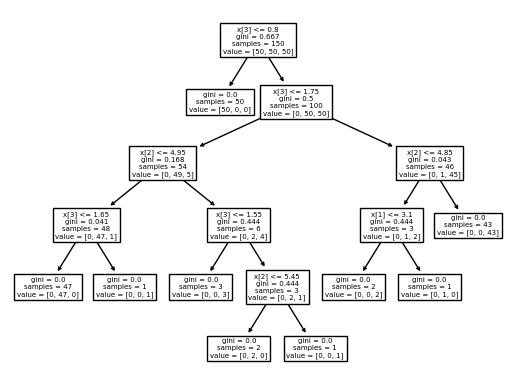

In [13]:
# classification
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import cross_val_score

dtc = tree.DecisionTreeClassifier(
    criterion='gini', # function đo chất lượng split
    splitter='best', # chiến lược to choose the split each node 
    max_depth=None, # độ dài tối đa của tree
    min_samples_split=2, # Số sample tối thiểu cần có để tiếp tục thực hiện split, 
                            # nếu sample ít hơn, thực hiện assign class bằng probability lớn hơn.
    min_samples_leaf=1, # Số sample tối thiểu của 1 leaf, sẽ không tạo ra các leaf có số sample trong leaf ít hơn
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0, # Node sẽ split nếu mức giảm impurity lớn hơn hoặc bằng giá trị này
    class_weight=None,
    ccp_alpha=0.0,
)
iris = load_iris()
dtc.fit(iris.data, iris.target)
# plot = tree.plot_tree(dtc,)

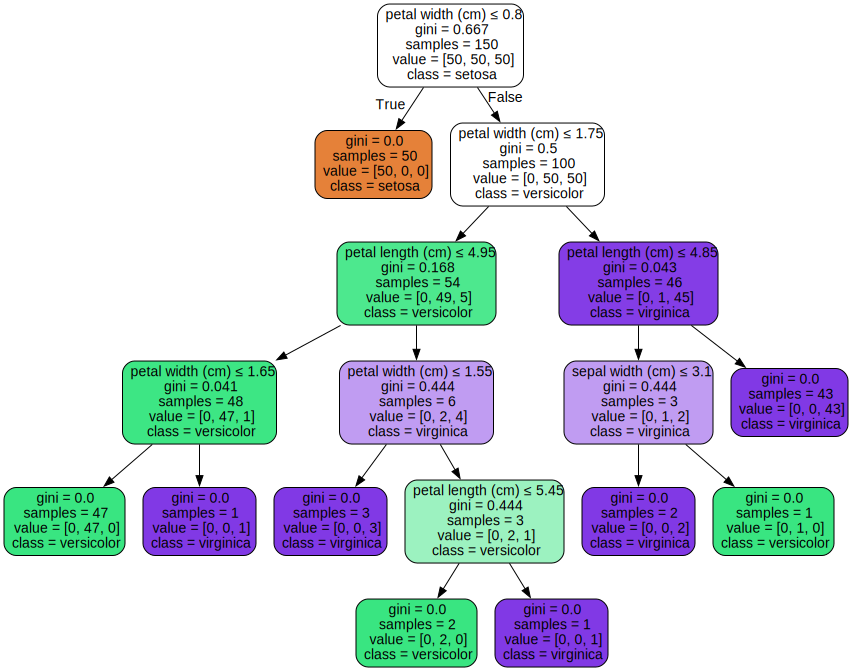

In [17]:
import graphviz
dot_data = tree.export_graphviz(dtc, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

# render to pdf
# graph.render("iris") 

## Ensemble learning

### Weighted
Sử dụng kết hợp nhiều model và kết hợp lại thành 1 meta-model:
- Với regression: Average outcome
- Với Classification: majority label


### Bagging

Xây dựng các models cùng lại nhưng train trên các subsamples khác nhau từ raw-sample, các subsample này được sinh ra từ phương pháp __bootstraping with replacement__. 

Các model này độc lập và song song với nhau, kết quả cuối cùng sử dụng trung bình cộng các decision rules hoặc `majority class`

--> Mục tiêu là giảm __variance__ - áp dụng cho các model đã có sẵn __bias thấp__ và đang bị __variance cao__

#### Random Forest
RF ngoài việc tạo __bootstrap with replacement subsample by records__ từ raw sample thì còn thực hiện __bootstrap without replacement by variables__

Tuy nhiên FR là 1 blackbox model, khác với simple decision tree.

--> giúp giải quyết vấn đề khi input đầu vào thiếu 1 số features (chứa nan và không muốn imputation)

__1. out of bag score (oob)__
- __OOB sample__ là tập obs không nằm trong tập train (dc bootstrap trong total obs) của mỗi single tree.
- __OOB score__ là một cách validate RF model, thông qua tính tỷ lệ obs trong oob sample dc dự đoán đúng bởi single tree tương ứng. ví dụ: `xi` không thuộc tập train của các tree `DT1`, `DT2`,... ,`DTn`, sẽ được dự báo bởi các tree này, nếu majority voting == real labels ---> xi là 1 obs predict đúng. làm tương tự vs các obs khác và tính tỷ lệ predict đúng.
- __OOB error__ = 1 - __OOB score__: thể hiện tỷ lệ obs oob dự đoán sai.

OOB error is a way similar a validation score but in __smaller dataset__(not suitable for split train + val dataset), check the error rate change by number of estimator

<img src="_images/01_ens_bag_oob.png">

__2. Variable Importance__ (`model.feature_importances_`)

- **decrease in accuracy of the model**: Mức độ giảm độ chính xác của model thông qua oob_score nếu biến này được hoán đổi random value giữa các records 1 cách ngẫu nhiên. Nếu mức decrease in accuracy càng lớn thì biến đó bằng quan trọng.

<img src="_images/01_ens_bag_de_acc.png">

- **Giá trị giảm trung bình của gini impurity score**: TÍnh mức độ giảm điểm Gini impurity score trên node khi có biến đó được sử dụng, tính toán trên bộ train data, thay vì tính điểm oob trên validation data nên kém chính xác hơn. Tuy nhiên, pp này hiệu quả về mặt tính toán nếu sử dụng nhiều cây, hơn nữa còn show ra được các biến model đang coi là importance thay vì các biến kiểm tra từ tệp bên ngoài.

gini decrease: `model.feature_importances_ `

<img src="_images/01_ens_bag_de_gini.png">

__3. Tunning hyperparameter__
- `nodesize`: tăng nodesize giảm overfitting
- `min_samples_leaf`:
- `maxnodes` = 2 * `max_leaf_nodes` - 1 = Số lượng node tối đa cho mỗi 1 decision tree 

In [19]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [20]:
X, y = load_wine(return_X_y =True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [25]:
rfc = RandomForestClassifier(
    n_estimators=100, # The number of trees in the forest.
    criterion='gini', # Function to measure quality of split {“gini”, “entropy”, “log_loss”}
    max_depth=None, # max depth of single tree, higher is more overfitting 
    min_samples_split=2, # Số sample tối thiểu cần có để tiếp tục thực hiện split, 
                            # nếu sample ít hơn, thực hiện assign class bằng probability lớn hơn.
    min_samples_leaf=1, # Số sample tối thiểu của 1 leaf, sẽ không tạo ra các leaf có số sample trong leaf ít hơn
    min_weight_fraction_leaf=0.0,
    max_features='sqrt', # The number of features to consider when looking for the best split
    max_leaf_nodes=None, # Số lượng node tối đa cho mỗi 1 decision tree
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=True, # use out-of-bag samples to estimate the generalization score
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None, # If bootstrap is True, the number of samples to draw from X to train each base estimator
)

rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9555555555555556

In [26]:
# oob score
print('oob score = ',rfc.oob_score_)

# oob error
print('oob error = ',1 - rfc.oob_score_)

oob score =  0.9699248120300752
oob error =  0.03007518796992481


__Feature importance based on mean decrease in impurity__

Warning: Impurity-based feature importances can be misleading for high cardinality features (many unique values)

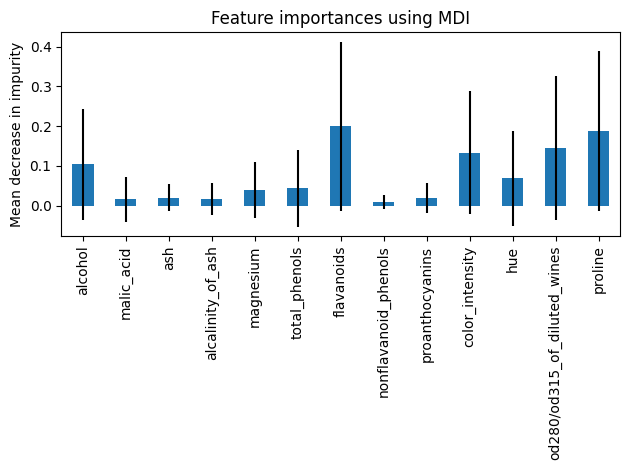

In [32]:


import pandas as pd
import numpy as np
import matplotlib. pyplot as plt

importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

__Feature importance based on feature permutation__

Permutation feature importance overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality features and can be computed on a left-out test set.

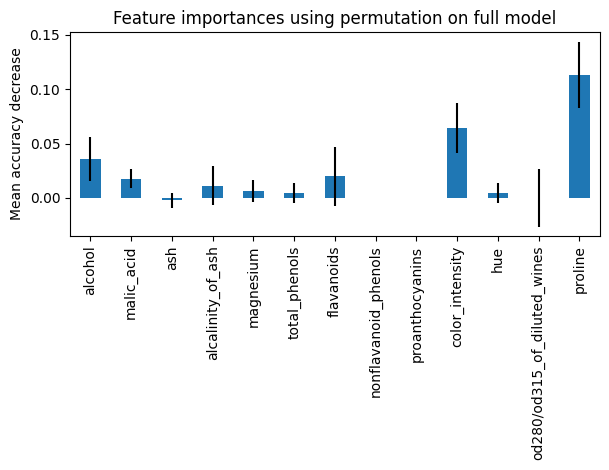

In [34]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rfc, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=X.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

#### Extremely Randomized Trees (extra-tree)
Tương tự như random forest, khác ở điểm thay vì chọn ngưỡng tối ưu để split (cut-off split point) ở node như RF thì sẽ chọn ngẫu nhiên ở ET.
- Thuật toán chạy nhanh hơn so với RF, nên phù hợp với dữ liệu lớn hơn

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier().fit(X_train, y_train)
etc.score(X_test, y_test)

0.9555555555555556

#### Bagging meta-estimator
Sử dụng estimator bất kỳ cho phương pháp bagging

In [35]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),
                            max_samples=0.5, max_features=0.5)

### Boosting

Xây dựng các model cùng loại, mỗi model sau sẽ dự đoán error của model trước, tạo thành chuỗi model mà model sau sẽ tốt hơn model trước.

--> Mục tiêu là giảm bias - áp dụng cho các model có variance thấp và bị bias cao

- Boosting là một quá trình tuần tự, không thể xử lí song song, do đó, thời gian train mô hình có thể tương đối lâu.
- Sau mỗi vòng lặp, Boosting có khả năng làm giảm error theo cấp số nhân.
- Boosting sẽ hoạt động tốt nếu base learner của nó không quá phức tạp cũng như error không thay đổi quá nhanh.
- Boosting giúp làm giảm giá trị bias cho các model base learner.

#### AdaBoost
Thuật toán tổng hợp các submodel theo trọng số trên toàn bộ data với model sau được build trên data đã được re-weighting với idea trên model trước đó, data point nào gây ra error lớn thì có weight cao hơn và ngược lại.

Tuy nhiên với dữ liệu có large error (bias) thì Gradient Boosting hiệu quả hơn

- AdaBoost can be used both for classification and regression problems

**Procedure**

1. Khởi tạo ban đầu với tham số 
- $M$ là số lượng submodels, 
- weight của $N$ data point ban đầu $w_0 =\frac{1}{N}$, 
- final model ban đầu $F_0$ = 0.

2. Tại vòng lặp thứ i:
- Train model $f_i$ để lấy được `minimizes weighted error` $\epsilon_i$ = tổng các trọng số $w_i$ của các data point bị misclassified (dự đoán bị sai). 
- Tính trọng số `model_i` theo công thức: $\alpha_i = 0.5*\ln(\frac{1}{\epsilon_i} -1)$
- Cập nhật $w_{i+1}$ cho $N$ datapoint model tiếp theo: 
$w_{i+1(n)} = w_i * e^{- y_n * \alpha_i * f_i(x_n)} $ cho datapoint thứ n
- Chuẩn hoá $w_{i+1}$ bằng cách chia cho tổng $w_{i+1}$ sao cho tổng của chúng = 1
- Cập nhật final model: $F_i = F_{i-1} + \alpha_i * f_i$
- Output khi chạy model là $H = sign(F_M)$
    
FYI: AdaBoost có thể được áp dụng mà không cần dựa vào việc đánh trọng số lại các điểm dữ liệu, thay vào đó, chúng ta có thể re-sample để lấy dữ liệu train cho các model tiếp theo dựa vào xác suất được xác định bới các trọng số.

In [39]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(    
    estimator=None, # thuật toán kết hợp với pp adaboost, mặc định là decision tree
    n_estimators=50, # số lượng tối đa estimators sử dụng, nếu vượt quá thì ko quá trình boosting nữa
    learning_rate=1.0, # hệ số learning rate
)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8666666666666667

#### Gradient Boosting
Tương tự như cách hoạt động của adaboost, thay vì cập nhật weight các features thì gradient boosting cập nhật `model mới` = `model cũ` + `pseudo-residuals`

Model tiếp theo sẽ fit vào `pseudo-residuals` của model trước đó
$M_{n}=M_{n-1}-\eta{\frac{\partial}{\partial m}}L(M_{n-1})$

#### XGBoost
Base trên gradient boosting nhưng cải tiến về mặt thuật toán, kết hợp cả GPU và CPU
- XGBoost có thể được sử dụng để giải quyết được tất cả các vấn đề từ hồi quy (regression), phân loại (classification), ranking và giải quyết các vấn đề do người dùng tự định nghĩa.
- Engineering để tránh overfitting như: sub-sampling row, column, column per split levels, áp dụng regularized L1 và L2.
- Khả năng tận dụng tài nguyên hệ thống: tính toán song song trên CPU/GPU, tính toán phân tán trên nhiều server, tính toán khi tài nguyên bị giới hạn, cache optimization để tăng tốc training.
- Và cuối cùng là khả năng xử lý missing data value, tiếp tục training bằng mô hình đã được build trước đó để tiết kiệm thời gian.

__1. Avoid overfitting__
Overfitting in XGB có thể dẫn tới predict dữ liệu chưa có trong tập train có thể giảm độ chính xác và kết quả dự đoán có high variance, unstable. Các pp giảm overfitting:
- __Cross-validation__
- __Regularization__: Sử dụng penalty (L1 hoặc L2) cho cost function. Increasing `alpha` or `lambda` will penalize more complex models and reduce the size of trees that are fit 
    - `reg_alpha` : Manhattan distance (L1 regu)
    - `reg_lambda` : squared Euclidean dítance (L2 regu)
- __Early stopping__:
- __Reduce number of trees__:
- __Reduce number of features selection__:

__2. Hyperparameters__
- `eta/learning_rate`: the alpha in The Boosting Algorithm, if the data has more noisy, reduce the `lr`
- `max_depth`: the maximum depth of leaf, lower maxdepth helps reduce overfitting
- `nrounds/n_estimators`: số lượng tối đa estimators sử dụng (boosting rounds). Nếu lr thấp, nên set n_estimators cao do quá trình học chậm, update ít.
- `subsample`: tỷ lệ %rawsample without replacement cho mỗi 1 round model, để thấp tránh được overfitting
- `colsample_bytree`: tỷ lệ %features use for each round model, để thấp tránh được overfitting, hỗ trợ cho TH input predict bị thiếu feature
- `lambda/reg_lambda` and `alpha/reg_alpha`: Hệ số alpha (Lasso - L1) và lambda (Ridge-L2) cho regularization

In [55]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y = True, as_frame = True)
X_train, X_test, y_train, y_test = train_test_split(X, y)
eval_set = [(X_train, y_train), (X_test, y_test)]

param_grid = {
  "objective": ["binary:logistic"], 
  "booster": ["gbtree"], 
  "max_depth": [3 ] , #[3, 5, 7], # default: 3 only for depthwise
  "n_estimators": [20] , # [500, 1000], # default: 500  
  "learning_rate": [0.05 ] , # [0.1, 0.05, 0.01], # default: 0.05 
  "subsample": [0.6] , #  [0.6, 0.8], 
  "colsample_bytree": [0.6] , #  [0.6, 0.8],
  "colsample_bylevel": [0.6] , #  [0.6, 0.8],
  "random_state": [1],
  'min_child_weight': [11], 
  "eval_metric": ["auc"], 
}
cv=StratifiedKFold(n_splits=4, shuffle=True, random_state=1)

xgb_model = xgb.XGBClassifier()

grid_search = GridSearchCV(xgb_model, param_grid, n_jobs=2, 
                        cv = cv, scoring='roc_auc', verbose=1)

grid_result = grid_search.fit(X_train, y_train, verbose = 0, eval_set=eval_set)
print("Best Score: ", grid_result.best_score_)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Best Score:  0.9807611853320808


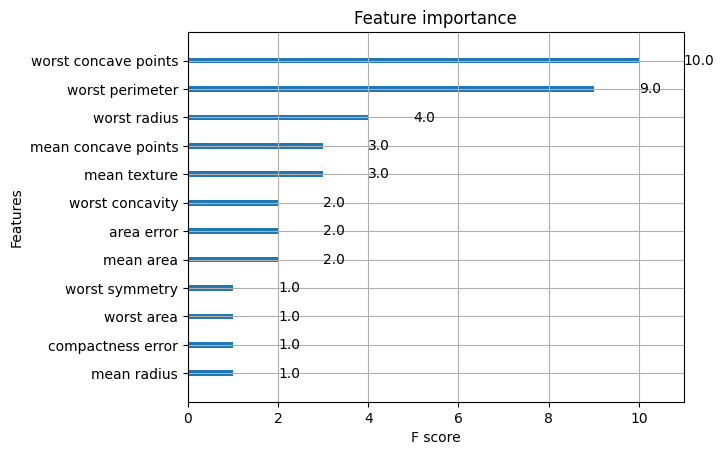

In [47]:
# default plot_importance
from xgboost import plot_importance
plot_importance(grid_search.best_estimator_)
plt.show()

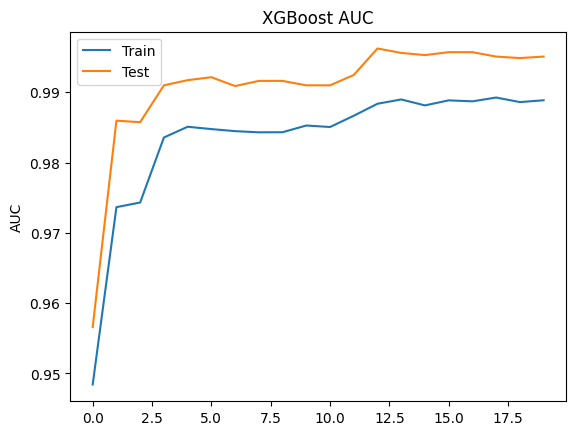

In [56]:
# evaluation plot
# retrieve performance metrics 
results = grid_search.best_estimator_.evals_result()
epochs = len(results['validation_0' ]['auc'])
x_axis = range(0, epochs)
 
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()

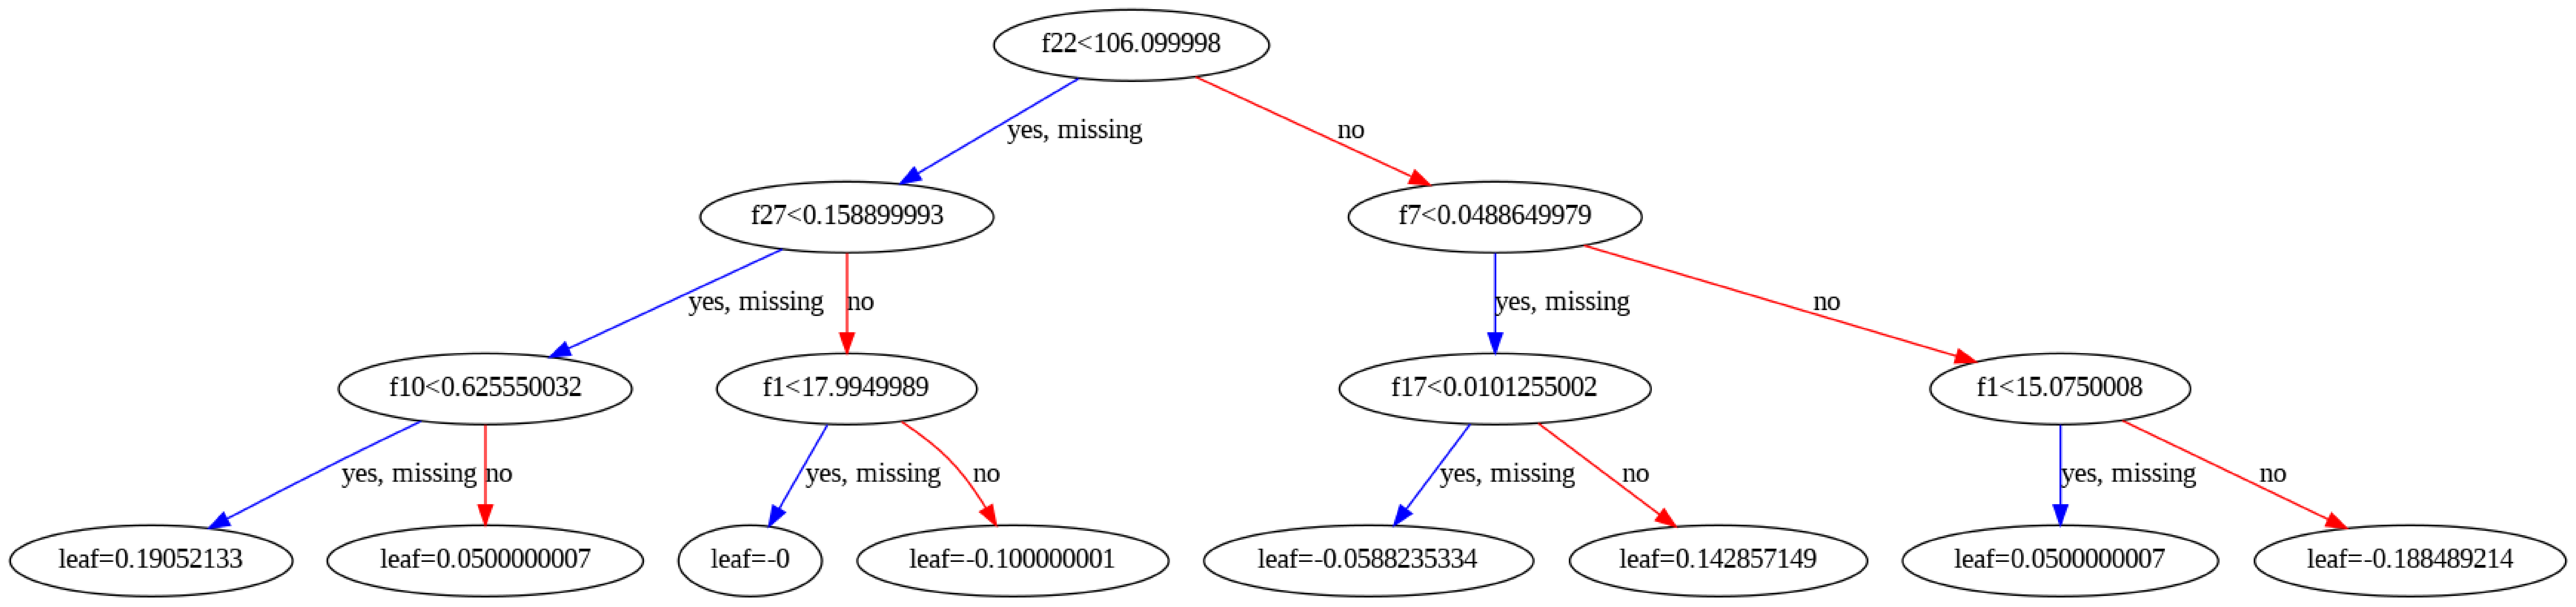

In [ ]:
# tree plot
from xgboost import plot_tree
import matplotlib.pyplot as plt
 
plot_tree(model)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')
plt.show()

#### LightGBM

__LightGBM__ sử dụng "histogram-based algorithms" thay thế cho "pre-sort-based algorithms " thường được dùng trong các boosting tool khác để tìm kiếm split point trong quá trình xây dựng tree. Cải tiến này giúp LightGBM tăng tốc độ training, đồng thời làm giảm bộ nhớ cần sử dụng. Cả xgboost và lightgbm đều sử dụng histogram-based algorithms, điểm tối ưu của lightgbm so với xgboost là ở 2 thuật toán: GOSS (Gradient Based One Side Sampling) và EFB (Exclusive Feature Bundling) giúp tăng tốc đáng kể trong quá trình tính toán. Chi tiết về GOSS và EFB, các bạn có thể đọc thêm tại: https://towardsdatascience.com/what-makes-lightgbm-lightning-fast-a27cf0d9785e

__LightGBM__ phát triển tree dựa trên __leaf-wise__, trong khi hầu hết các boosting tool khác (kể cả `xgboost`) dựa trên __level-wise__. 
- __Leaf-wise__ phát triển tree theo node đang xét cho hết node đó rồi mới nhảy sang node tiếp theo ==> nên sử dụng `maxdepth` để tránh overfitting. 
- __Leaf-wise__ lựa chọn nút để phát triển cây dựa trên tối ưu toàn bộ tree, trong khi __level-wise__ tối ưu trên nhánh đang xét (__level-wise__: phát triển theo tầng của tree, khi phát triển hết tầng thì mới nhảy xuống tầng tiếp theo.), do đó, với số node nhỏ, các tree xây dựng từ __leaf-wise__ thường out-perform __level-wise__.

Note: Leaf-wise tuy tốt, nhưng với những bộ dữ liệu nhỏ, các tree xây dựng dựa trên leaf-wise thường dẫn đến overfit khá sớm. Do đó, lightgbm sử dụng thêm 1 hyperparameter là maxdepth nhằm cố gắng hạn chế điều này. Dù vậy, LightGBM vẫn được khuyến khích sử dụng khi bộ dữ liệu là đủ to.

__Lựa chọn LightGBM thay cho XGBoost__:
- Dữ liệu lớn
- Nhiều categorical features
- Ưu tiên tốc độ hơn performance model
- Khắc phục vấn đề training lâu cho dữ liệu lớn của XGboost

### Stacking

Xây dựng các base-model khác loại train trên cùng 1 bộ dữ liệu tạo thành 1 meta model, train các model này độc lập sau đó sẽ tìm cách kết hợp/ hoặc xây dựng 1 metamodel để predict output từ input là output của các base-model

--> Mục tiêu là giảm bias - áp dụng cho các model có variance thấp và bị bias cao

**1. Level-model**
- __Level 0 (base model)__: Mô hình cơ sở học trực tiếp từ bộ dữ liệu và đưa ra dự đoán cho mô hình level-1
    - Các base-models có những cách học khác nhau trên bộ dữ liệu, cho nên outputs hay errors của các base-models là không tương quan (uncorrelated) hay có độ tương quan thấp (low correlation).
    - Đầu ra của base-models có thể là giá trị thực (cho bài toán Hồi quy) hoặc là các xác suất của nhãn trong bài toán phân loại.
    - Base-models thường phức tạp và đa dạng, mỗi mô hình có cách học và giải quyết vấn đề khác nhau với cùng một bài toán như: Decision Tree, SVM, Neural Network,... và kể cả là các thuật toán ensemble khác như GBM, Random Forest,...
- __Level 1 (meta model)__:Mô hình học từ các dự đoán của mô hình cơ sở (level-0) hoặc có thể kết hợp thêm input của base model, Meta-model thường đơn giản:
    - Linear Regression cho bài toán Regression -> Trả về số thực
    - Logistic Regression cho bài toán Classification -> Trả về xác suất các label
    
**Thuật toán stacking**
- Khởi tạo ban đầu:
    - Dataset = Train + Test
    - Train = k-fold
    - Set base-models (M) - level 0
    - Strong-model (H) - level 1
- Với mỗi base-model (m) trong set base-models (M):
    - Với mỗi fold, train model m trong k-1 fold còn lại và predict fold đó. Sau k vong lặp, thu được k-fold predicted từ k model (cùng 1 base-model) mà kết quả predict này không xuất hiện để train model (tránh được overfitting).  k-fold predicted này sẽ sử dụng làm 1 feature trong train-dataset cho model H.
    - Lấy toàn bộ dữ liệu trong train data để train model thứ k+1 (cùng base-model) và predict test data, kết quả thu được làm 1 feature trong test-dataset cho model H
- Lặp lại với các M-1 base model khác thu được tổng cộng M feature của train và M feature của test dataset cho model H

Một số biến thể trong cách triển khai:
- Kết hợp 1 số features của base-model + predicted base-model = tranining dataset của meta-model
- Thay vì sử dụng toàn bộ train dataset để build base-model thứ k+1 và predict test dataset thì sử dụng k-model từ k-fold để predict luôn test dataset, thu được k bộ dự đoán về test dataset. Phương pháp tổng hợp kết quả của k bộ dự đoán test dataset là nếu bài toán regression thì dùng mean, Nếu bài toán Classification thì cùng max-voting
- Multi-levels Stacking: Tăng thành 3 level model, tuy nhiên không sử dụng k-fold, thì số lượng dữ liệu cần dùng là rất nhiều, vì hiện tượng overfitting rất dễ xảy ra, nhưng nếu sử dụng k-fold, thì thời gian huấn luyện là cực kì tốn kém.

**Stacking family**
___1. Voting ensemble___

Thay vì sử dụng 1 meta-model (level 1) thì sử dụng các phương pháp lựa chọn output đơn giản hơn:
- Trong bài toán Regression, Voting đưa ra mean hoặc median của các predictions từ các base-models
- Trong bài toán Classification, Voting sẽ sử dụng Hard-voting (Class được predicted nhiều nhất) hoặc Soft-voting (Class có tổng xác suất được predicted là cao nhất)
Trong Voting, tất cả các base-models được giả định có cùng độ quan trọng như nhau, cùng hiệu năng như nhau, 

___2. Weighted Average Ensemble___

Điều chỉnh Voting ensemble bằng việc thêm weighted cho base-model dựa trên độ chính xác hoặc tự build 1 process để tối ưu trọng số

___3. Blending Ensemble___

Thay đổi stacking bằng cách thay vì sử dụng cross-validation ở training set thì chia training set thành `train set` + `validation set`:
- `Trainset` dùng để train base model, sau đó predict tại `validationset`
- `Validationset` + prediction `validationset` (base-model) sẽ làm input (__set1__) cho meta-model
- `Test set` và các kết quả dự đoán trên `test set` của các base models được sử dụng như là `test set` (__set2__) của blending model.
- Train và đánh giá blending model sử dụng __set1__ và __set2__.

___4. Super Learner Ensemble___

<img src="_images/01_ens_stk_SuperLearnerEnsemble.png">

In [59]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# load data
X_train, X_test, y_train, y_test = train_test_split(*load_diabetes(return_X_y=True))

# setup base model (level 0)
estimators = [('ridge', RidgeCV()),
              ('lasso', LassoCV(random_state=42)),
              ('knr', KNeighborsRegressor(n_neighbors=20,
                                          metric='euclidean'))]

# setup meta model (level1)
# The final_estimator will use the predictions of the estimators as input
final_estimator = GradientBoostingRegressor(n_estimators=25, subsample=0.5, 
                                            min_samples_leaf=25, max_features=1,)
reg = StackingRegressor(estimators, final_estimator)
reg.fit(X_train, y_train)

reg.score(X_test, y_test)

0.42738455065984304

In [62]:
# multi layer stacking

from sklearn.ensemble import RandomForestRegressor

multi_layer_regressor = StackingRegressor(
    estimators=[('ridge', RidgeCV()),
                ('lasso', LassoCV()),
                ('knr', KNeighborsRegressor(n_neighbors=20,
                                            metric='euclidean'))],
    final_estimator=StackingRegressor(
        estimators=[('rf', RandomForestRegressor(n_estimators=10, max_features=2)),
                    ('gbrt', GradientBoostingRegressor(n_estimators=10, max_features=2))],
        final_estimator=RidgeCV()
    )
)
multi_layer_regressor.fit(X_train, y_train)
multi_layer_regressor.score(X_test, y_test)

0.41430511335119347

## Multi-class and multi-output
[Chi tiết](https://scikit-learn.org/stable/modules/multiclass.html#multiclass-classification)
(updating)

## Neural network models

### Extreme Learning Machine (ELM)

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from scipy.special import expit
from sklearn.model_selection import train_test_split

class ELMClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, node, activation_func, output_node='softmax', faster=None, C=None, p=None, random_state=None):
        self.no_node = node
        
        self.af = activation_func
        if self.af not in ['relu','sig','sin','hardlim','new']:
            raise ValueError('Parameter Activation function must be one in [relu, sig, sin, hardlim, new]')
            
        self.output_node = output_node
        if self.output_node not in ['sig','softmax']:
            raise ValueError('Parameter Activation function must be one in [relu, sig, sin, hardlim, new]')
        
        self.faster = faster
        if self.faster not in [None,1,2]:
            raise ValueError('Parameter faster must be one in [None, 1, 2]')
        
        self.C = C
        if self.faster != None:
            if C == None: 
                raise ValueError('Missing regularization value C')
        
        self.p = p
        if (self.af == 'new'): 
            if p == None:
                raise ValueError('Missing p for new activation function')
            else:
                self.p = int(p)

        self.random_state = random_state
        
    def fit(self, X, y):
        
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
        # Check the unique classes seen during fit
        self.classes_ = unique_labels(y)
        self.y_ = OneHotEncoder().fit_transform(y.reshape(-1,1)).toarray()
        
        # Initiate random input weights and bias
        if self.random_state != None:
            np.random.seed(self.random_state)
        
        self.input_weights = np.random.normal(size=[X.shape[1],self.no_node])
        self.biases = np.random.normal(size=[self.no_node])
        
        # The smallest norm least square solution
        H = self.hidden_nodes(X)
        if self.faster == 1:
            self.output_weights = H.T @ np.linalg.inv(np.identity(X.shape[0])/self.C + H @ H.T) @ self.y_
        elif self.faster == 2:
            self.output_weights = np.linalg.inv(np.identity(self.no_node)/self.C + H.T @ H) @ H.T @ self.y_
        else:
            self.output_weights = np.dot(np.linalg.pinv(H), self.y_)
    
    def relu(self, x):
        return np.maximum(x, 0, x)
    
    def sin(self, x):
        return np.sin(x)
    
    def hardlim(self, x):
        x = np.array(x)
        return np.where(x >= 0, 1, 0)

    def sigmoid(self, x):
        return expit(x) # 1/(1+np.exp(-x)) RuntimeWarning: overflow encountered in exp
    
    def new(self, x, p):
        return x/(1 + x**(4*p-2))**(1/(4*p-2))
        
    def softmax(self, x):
        return np.exp(x)/np.sum(np.exp(x), 1).reshape(-1,1)
    
        
    def hidden_nodes(self, X):
        G = np.dot(X, self.input_weights) + self.biases
        if self.af == 'relu':
            H = self.relu(G)
        elif self.af == 'sig':
            H = self.sigmoid(G)
        elif self.af == 'sin':
            H = self.sin(G)
        elif self.af == 'hardlim':
            H = self.hardlim(G)
        elif self.af == 'new':
            H = self.new(G)
            
        return H
    
    def predict(self, X):
        # Check is fit had been called
        check_is_fitted(self)
        # Input validation
        X = check_array(X)
        
        prediction = np.argmax(np.dot(self.hidden_nodes(X), self.output_weights),1)
        
        return prediction
    
    def predict_proba(self, X, mode='softmax'):
        # Check is fit had been called
        check_is_fitted(self)
        # Input validation
        X = check_array(X)
        
        prediction = np.dot(self.hidden_nodes(X), self.output_weights)
        if self.output_node == 'softmax':
            proba = self.softmax(prediction) # Use softmax function to convert to probability, calculating for different classes' output
        elif self.output_node == 'sig':
            proba = self.sigmoid(prediction[:,1]) # Use sigmoind function to convert to probability from a real value (for binary classification ONLY, output just for positive class
  
        return proba
    
    def get_params(self, deep=False):
        return {'node':self.no_node,
                'activation_func':self.af,
                'faster':'self.faster', 
                'C':self.C, 
                'p':self.p, 
                'random_state':self.random_state}

In [ ]:
class EELMClassifier(ELMClassifier):
    def __init__(self, node, activation_func, output_node='softmax', faster=None, C=None, p=None, no_bat=20, alpha=0.5, gamma=0.5, max_iter=100, freq_min=0, freq_max=10):
        super().__init__(node, activation_func, output_node, faster, C, p)
        
        self.bat_pop = no_bat # Population of bats
        self.max_iter = max_iter
        
        # Parameters for random walk
        self.alpha = alpha
        self.gamma = gamma
        
        # Range of Frequency
        self.freq_min = freq_min
        self.freq_max = freq_max
        
        
    def fit(self, X, y):
        # Check that X and y have correct shape
        X, y = check_X_y(X, y)
        # Check the unique classes seen during fit
        self.X_ = X
        self.classes_ = unique_labels(y)
        self.y_ = OneHotEncoder().fit_transform(y.reshape(-1,1)).toarray()
        
        # Initialization parameter for BA
        self.dim = self.no_node*X.shape[1] + self.no_node # Dimension of Pos
        self.freq = np.zeros(self.bat_pop)
         
        self.Pos = np.random.rand(self.bat_pop,self.dim) # Store Positions: each row is Pos of a bat
        self.Vel = np.random.rand(self.bat_pop,self.dim) # Store Velocity: each row is Vel of a bat for the defined dimension
        self.L = np.random.rand(self.bat_pop) # Initiate Loudness for each bat
        self.r_init = np.random.rand(self.bat_pop) # Initiate Pulse emission rate for each bat
        self.r = self.r_init
        
        # Store the best solution
        self.fitness = np.zeros(shape=(self.max_iter, self.bat_pop)) # Store fitness for each bat's Pos as row
        self.best = np.zeros(shape=(self.max_iter, self.dim)) # Store the best Pos that minimizes the fitness as row
        self.f_min = np.zeros(self.max_iter) # Store fitness value for the best Pos
        
        self.final_Pos, self.final_rmse = self.generate_pos()
        
        self.input_weights = self.final_Pos[:-self.no_node].reshape(X.shape[1], self.no_node)
        self.biases = self.final_Pos[-self.no_node:]
        
        # The smallest norm least square solution
        H = self.hidden_nodes(X)
        if self.faster == 1:
            self.output_weights = H.T @ np.linalg.inv(np.identity(X.shape[0])/self.C + H @ H.T) @ self.y_
        elif self.faster == 2:
            self.output_weights = np.linalg.inv(np.identity(self.no_node)/self.C + H.T @ H) @ H.T @ self.y_
        else:
            self.output_weights = np.dot(np.linalg.pinv(H), self.y_)
    
    def best_bat(self,t):
        # t: t_th iteration
        best_bat = np.argmin(self.fitness[t]) # Get the bat with best fitness
        self.best[t] = self.Pos[best_bat] # Store its Pos
        self.f_min[t] = self.fitness[t, best_bat] # Store its fitness value
     
    def generate_pos(self):
        t = 0
        while t < self.max_iter:
            for i in range(self.bat_pop):
                r = np.random.rand() # Random value from a uniform distribution over [0, 1)
                self.freq[i] = self.freq_min + (self.freq_max - self.freq_min)*r
                self.Vel[i] = self.Vel[i] + (self.Pos[i] - self.best[t])*self.freq[i]
                self.Pos[i] = self.Pos[i] + self.Vel[i]
                # Update fitness
                self.fitness[t, i] = self.rmse(self.Pos[i], 1)          
            
            # Get the best solution
            self.best_bat(t)
            
            # Random walk procedure
            epsilon = np.random.uniform(-1, 1)
            for i in range(len(self.L)):
                self.Pos[i] = self.Pos[i] + epsilon*self.L[i]
            
            self.L = self.alpha*self.L
            self.r = self.r_init*(1-np.exp(-self.gamma*t))
            
            t += 1
        
        return self.best[np.argmin(self.f_min)], np.min(self.f_min)
    
    def rmse(self, Pos, random_state):
        # Split train:test = 9:1
        X_train, X_test, y_train, y_test = train_test_split(self.X_, self.y_, test_size=0.1, stratify=self.y_, random_state=random_state)
        
        input_weights = Pos[:-self.no_node].reshape(X_train.shape[1], self.no_node)
        biases = Pos[-self.no_node:]
        
        #train
        G = np.dot(X_train, input_weights) + biases
        if self.af == 'relu':
            H = self.relu(G)
        elif self.af == 'sig':
            H = self.sigmoid(G)
        elif self.af == 'sin':
            H = self.sin(G)
        elif self.af == 'hardlim':
            H = self.hardlim(G)
        elif self.af == 'new':
            H = self.new(G)
        
        if self.faster == 1:
            output_weights = H.T @ np.linalg.inv(np.identity(X.shape[0])/self.C + H @ H.T) @ y_train
        elif self.faster == 2:
            output_weights = np.linalg.inv(np.identity(self.no_node)/self.C + H.T @ H) @ H.T @ y_train
        else:
            output_weights = np.dot(np.linalg.pinv(H), y_train)
        
        #validate
        G_val = np.dot(X_test, input_weights) + biases
        if self.af == 'relu':
            H_val = self.relu(G_val)
        elif self.af == 'sig':
            H_val = self.sigmoid(G_val)
        elif self.af == 'sin':
            H_val = self.sin(G_val)
        elif self.af == 'hardlim':
            H = self.hardlim(G_val)
        elif self.af == 'new':
            H_val = self.new(G_val)
        
        T_hat = np.dot(H_val, output_weights)
        
        return np.linalg.norm(T_hat - y_test)
    
    def get_params(self, deep=False):
        return {'node':self.no_node,
                'activation_func':self.af,
                'faster':'self.faster', 
                'C':self.C, 
                'p':self.p, 
                'no_bat':self.bat_pop, 
                'alpha':self.alpha, 
                'gamma':self.gamma, 
                'max_iter':self.max_iter, 
                'freq_min':self.freq_min, 
                'freq_max':self.freq_max}

### Multi-layer Perceptron (MLP)

Sử dụng kiến trúc mạng neural network nhiều hidden layer với input m chiều (m node + 1 bias node tại input layer) và output là o chiều (o node tại outpput layer), áp dụng cho model linear & non-linear classification và regression 
<img src="https://i.ibb.co/vw8GWsy/MLP.jpg" width="500"> 
_Note_: NN in sklearn not support GPU trainning

__Pros__:
- Capability to learn non-linear models.
- Capability to learn models in real-time (on-line learning) using `partial_fit`.

__Cons__:
- MLP với hidden layers có hàm a non-convex loss thì có thể có nhiều hơn 1 local minimum. Dẫn tới việc có thể có sự sai khác trong quá trình training tại các điểm startpoint ban đầu khác nhau
- MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.
- MLP is sensitive to feature scaling.

**1. Regularization**

Both `MLPRegressor` and `MLPClassifier` use parameter $\alpha$ for regularization (L2 regularization) term which helps in avoiding overfitting by penalizing weights with large magnitudes.

**2. Hidden layer size** `hidden_layer_sizes`
- Số hidden layers
- Số node mỗi hidden layer 
 
|<img src="https://qph.fs.quoracdn.net/main-qimg-65fa680a5effca84096237df3eb4ae88" width =400>|
|:--:|

- In `sklearn.neural_network.MLPClassifier`
    - `hidden_layer_sizes` = (9): 1 hidden layer với 9 node
    - `hidden_layer_sizes` = (9, 7, 4): 3 hidden layers với lần lượt 9,7 and 4 node
    - default (100,):  1 hidden layer với 100 neurons/node

`clf = MLPClassifier(hidden_layer_sizes=(9, 9,9))`

**3. Algorithms** (`solver`)

Các phương pháp update weight:

- `sgd` | __SGD__(supports online and mini-batch learning): weight được update theo hàm loss và learning rate
$$w\leftarrow w-\eta(\alpha\frac{\partial R(w)}{\partial w}+\frac{\partial L o s s}{\partial w})$$
__SGD__ with momentum or nesterov’s momentum, on the other hand, can perform better than those two below algorithms if `learning rate` is correctly tuned.

- `adam`__Adam__(supports online and mini-batch learning)(default): Adam kết hợp sự thay đổi momentum dựa theo gradient bậc 1 và bậc 2 . __Adam__ is very robust for relatively large datasets

- `lbfgs` | __L-BFGS__(not supports online and mini-batch learning) is a solver that approximates the Hessian matrix which represents the second-order partial derivative of a function. __L-BFGS__ converges faster and with better solutions on small datasets. Thuật toán sử dụng phương pháp quasi-Newton methods để tìm nghiệm của điểm tối ưu

**4. Activation functions** (`activation`)

- `identity`: simply returns $f(x) = x$
- `logistic`: the logistic sigmoid function, returns $f(x) = 1 / (1 + \exp(-x))$
- `tanh`: the hyperbolic tan function, returns $f(x) = \tanh(x)$
- `relu` (default):   the rectified linear unit function, returns $f(x) = \max(0, x)$

**5. Learning Rate**
- Sklearn supports __learning rates__  when solver=`sgd`
    - `constant`: a constant,  given by `learning_rate_init=0.001`.
    - `invscaling`: Giảm từ từ sau mỗi 1 epoch train
    - `adaptive`: 

**6. Tips**
- highly recommended to scale your data
- Find best $\alpha$ in range $[10^{-6}, 10^{-1}]$ by gridsearch
- If you want more control over stopping criteria or learning rate in __SGD__, or want to do additional monitoring, using `warm_start`=True and `max_iter`=1

#### MLP Classification
Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.

In [82]:
import numpy as np
import pandas as pd 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score

In [79]:
# data and preprocessing
def prepro_data():
    # load data
    df = pd.read_csv('Datasets/adult.csv' ).replace("?", np.nan)

    # X and y
    y = df['income'].apply(lambda x:0 if x=='<=50K' else 1)
    X = df.drop(['income'],axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # preprocessing
    preprocessor = ColumnTransformer([
        ('ohe', OneHotEncoder(handle_unknown= 'infrequent_if_exist'), make_column_selector(dtype_exclude=np.number)),
        ('scaler', MinMaxScaler(), make_column_selector(dtype_include=np.number))
    ]
    )

    X_train = preprocessor.fit_transform(X_train, y_train)
    X_test = preprocessor.transform(X_test)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = prepro_data()

In [83]:
# setup estimator
clf = MLPClassifier(random_state=1,  max_iter=3000)

parameter_grid = {
    'hidden_layer_sizes': [(3), # 1 hidden layer with 3 nodes   
                           (3,3) # 2 hidden layer with 3 nodes each layer
                          ], 
}

gs = GridSearchCV(clf, parameter_grid,  cv=5)
gs = gs.fit(X_train,y_train)

#set the clf to the best combination of parameters
clf_best = gs.best_estimator_
print("best model:", clf_best.get_params())
# Fit the best model to the data. 
clf_best = clf_best.fit(X_train, y_train)

accuracy_score(y_test, clf_best.predict(X_test))

0.8605793837649708

#### MLP Regression
Class `MLPRegressor` trains sử dụng __backpropagation__ with no activation function in the output layer, mà tại đó có thể sử dụng hàm customize để đạt được output mong muốn. Vì thế nó sử dụng the square error như là loss function, và the output là giá trị continuous.

MLPRegressor also supports multi-output regression, in which a sample can have more than one target.